Objetivo de hoy:
En esta clase aprenderemos a realizar cualquier tipo de gráf en base a investigar en la doc de matplotlib y otras fuentes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
%matplotlib inline

In [8]:
df = pd.read_csv('Iluminacion.csv')
df

,Latitud,Longitud,Luminosidad
0,1.764052,-0.202117,49.929240
1,0.400157,-0.833231,98.656690
2,0.978738,1.733600,68.735218
3,2.240893,0.190649,85.794230
4,1.867558,-0.177810,50.499409
...,...,...,...
9995,-1.809282,0.271662,65.661394
9996,0.042359,-0.108997,42.123643
9997,0.516872,-0.057259,18.950191
9998,-0.032921,-1.058931,8.672976


Este df podría ser un ej de la realidad de por ej la intensidad lumínica de las farolas de una ciudad en sus dif puntos(los puntos son el conj de la latitud y  la longitud).
El trab que tenemos que hacer con estos datos es básicamente hacer un gráf para ver donde hay mas farolas, en que áreas hay mas y en que áreas hay menos para poder colocar mas farolas en esas áreas donde hay menos

El 1er paso es ver que gráf usar y para eso toca investigar en matplotlib...

In [6]:
#Ya investigamos e matplotlib y usaremos este gráf:.hexbin
help(plt.hexbin)

Help on function hexbin in module matplotlib.pyplot:

hexbin(x, y, C=None, gridsize=100, bins=None, xscale='linear', yscale='linear', extent=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors='face', reduce_C_function=<function mean at 0x00000240E454AFC0>, mincnt=None, marginals=False, *, data=None, **kwargs)
    Make a 2D hexagonal binning plot of points *x*, *y*.
    
    If *C* is *None*, the value of the hexagon is determined by the number
    of points in the hexagon. Otherwise, *C* specifies values at the
    coordinate (x[i], y[i]). For each hexagon, these values are reduced
    using *reduce_C_function*.
    
    Parameters
    ----------
    x, y : array-like
        The data positions. *x* and *y* must be of the same length.
    
    C : array-like, optional
        If given, these values are accumulated in the bins. Otherwise,
        every point has a value of 1. Must be of the same length as *x*
        and *y*.
    
    gridsize : in

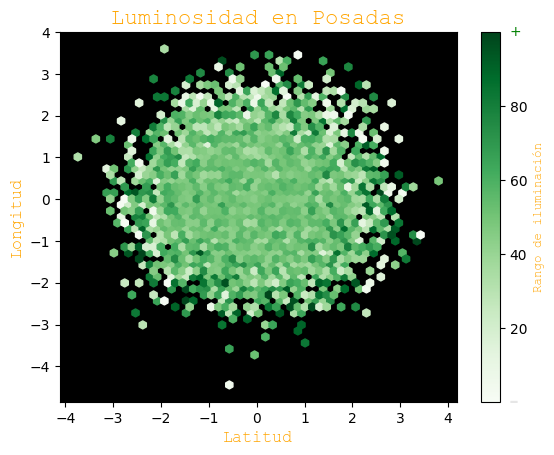

In [90]:
#Traemos de matplotlib la estructura del armado del gráf de la web de matplotlib y los construimos:
fig, ax = plt.subplots()#Creamos ls figura y los ejes para el gráf, usamos .subplots para facilitar futuras expansiones a múltiples gráficos
hb = ax.hexbin(df['Latitud'], df['Longitud'],C=df['Luminosidad'], gridsize=50,cmap='Greens')#Creamos el gráf el tipo de gráf hexbin con su fn y le específicamos el eje x, y, la C en la cúal hay que colocar los datos, el tamaños de los hexagonos, el color del mapa entero
ax.set_facecolor('#000000')#Seteamos el color de fondo, en este caso con este código de color le metemos el color negro

#Armamos los font para el título y todos los textos que estén en el gráf:
#Font para el nombre del título
font = {'family': 'Courier New',
        'color':  'orange',
        'weight': 'normal',
        'size': 16,
        }
#Font para el nombre de los ejes
font1 = {'family': 'Courier New',
        'color':  'orange',
        'weight': 'normal',
        'size': 12,
        }
#Font para el título de la barra de colores
font2 = {'family': 'Courier New',
        'color':  'orange',
        'weight': 'normal',
        'size': 9,
        }

#Creación del colorbar:
#Metemos el colorbar en una variable
colorbar = plt.colorbar(hb)#Le metemos una barra de color para que vea ale rango de luminosidad, le pasamos el gráf el cúal tiene que mapear y el título
colorbar.set_label('Rango de iluminación',fontdict = font2)#Aplicamos con la fn set_label el título de la barra y le pasamo el valor del font al parámetro fontdict
#Colocamos los signos de mayor y menor para q se vea el incremento dependiendo del color a la barra
colorbar.ax.text(1.5, 0, '-', va='center', ha='left', fontsize=20, color='#E6E6E6', transform=colorbar.ax.transAxes)
colorbar.ax.text(1.5, 1, '+', va='center', ha='left', fontsize=10, color='Green', transform=colorbar.ax.transAxes)

#Texto a los ejes x e y con su font cada uno
plt.xlabel('Latitud',fontdict=font1)#Título para el eje x
plt.ylabel('Longitud',fontdict=font1)#Título para el eje y

#Título para el gráf
plt.title('Luminosidad en Posadas',fontdict=font)#Título del gráfico


plt.show()